# 2.6 Computations on NumPy Array: Broadcasting

In [2]:
import numpy as np

In [3]:
# Would this work?
a = np.arange(3)
b = np.array([1,2,3])

print('a:', a)
print('b:', b)

print("a + b", a + b)

a: [0 1 2]
b: [1 2 3]
a + b [1 3 5]


### Using `newaxis` to Increase the Dimension of NumPy Array

- Using `newaxis` means, wrapping each elements in the array with `[]`

In [4]:
a = np.arange(3)
a

array([0, 1, 2])

In [5]:
b = np.ones(3)[:, np.newaxis]
b

array([[1.],
       [1.],
       [1.]])

means we are casting `[0,1,2]` to `[[0], [1], [2]]`.

In [6]:
# Broadcasting 101: How does this work?
print("a + b\n", a + b)

a + b
 [[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


### What is Broadcasting?

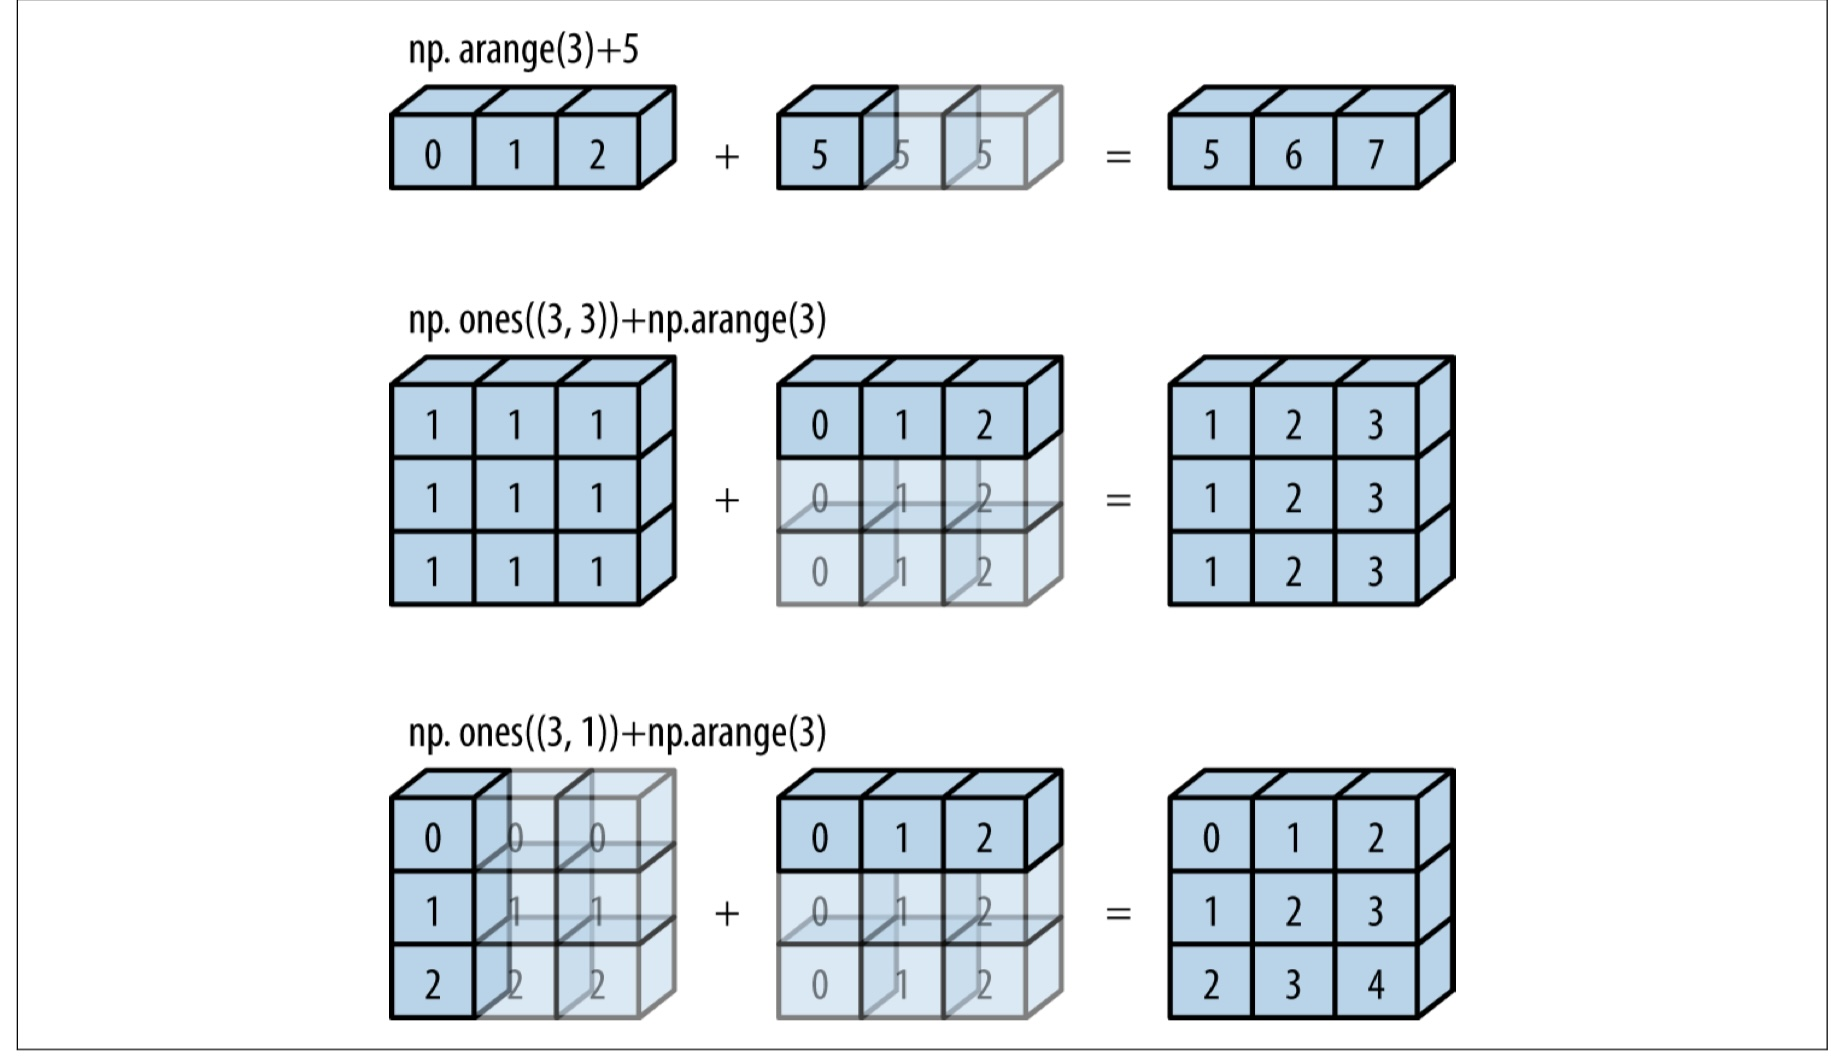

#### Rules of Broadcasting

- 1. If the two arrays differe in their number of dimension, the shape of the one with fewer dimensions is _padded_ with ones on its leading (left) side.
  - Rule 1 => `Match Dimension` ( e.g. 1D => 2D )
- 2. If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
  - Rule 2 => `Duplicate rows / cols in ndarray` ( e.g. (1,3) => (3,3) )
- 3. If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

__NOTE: (3,) and (1,3) are different!!__

(3,) = 1D array with 3 items (`[1,2,3]`) <br />
(3,1) = 2D array with 1 row and 3 items (`[[1,2,3]]`) <br />
(1,3) = 2D array with 3 rows each with 1 item (`[[1],[2],[3]]`) <br />

#### Example 1: Applying Rule 1

In [39]:
m1 = np.ones((2,3))
print("m1\n", m1)
print("shape:", m1.shape) # (2,3) -> 2 rows each with 3 items. (2D)

m1
 [[1. 1. 1.]
 [1. 1. 1.]]
shape: (2, 3)


In [40]:
m2 = np.arange(3)
print("m2\n", m2)
print("shape:", m2.shape) # (3,) -> 1D array with 3 items (1D)

m2
 [0 1 2]
shape: (3,)


In [41]:
# m1 = 2 rows with 3 items, m2 = 1 rows with 3 items
# the numpy will pad one more row in m2, to make it 2 rows with 3 items
# [0,1,2] (1D) => [[0.1,2]] (2D)

# Finally, [[1,1,1]        [[0.1,2],       [[1,2,3],
#           [1,1,1]]   +    [0,1,2]]   =    [1,2,3]]
m1 + m2

array([[1., 2., 3.],
       [1., 2., 3.]])

#### Example 2: Applying Rule 2

In [42]:
m3 = np.arange(3).reshape((3,1))
print("m3\n", m3)
print("shape:", m3.shape) # (3, 1) => 3 rows each with 1 item (2D)

m3
 [[0]
 [1]
 [2]]
shape: (3, 1)


In [43]:
m4 = np.arange(3)
print("m4\n", m4)
print("shape:", m4.shape) # (3,) => array with 3 items (1D)

m4
 [0 1 2]
shape: (3,)


In [34]:
# m3 = 3 rows each with 1 item, m4 = 1 row with 3 items
#  [[0],                                         [[0],                                             [[0,0,0],    [[0.1,2],
#   [1],  +  [0.1,2] (1D)    => (by Rule 1) =>    [1],   +  [[0.1,2]] (2D),   => (by Rule 2) =>     [1,1,1],  +  [0.1,2],  (padding 2 more rows) => 
#   [2]]                                          [2]]                                              [2,2,2]]     [0.1,2]]
#                                                                                                   (3 x 3)      (3 x 3)

m3 + m4

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

#### Example 3: Applying Rule 3

In [35]:
m5 = np.ones((3,2))
print("m5\n", m5)
print("shape:", m5.shape) # (3, 2) => 3 rows each with 2 item (2D)

m5
 [[1. 1.]
 [1. 1.]
 [1. 1.]]
shape: (3, 2)


In [37]:
m6 = np.arange(3)
print("m6\n", m6)
print("shape:", m6.shape) # (3, ) => 3 items (1D)

m6
 [0 1 2]
shape: (3,)


In [45]:
# m5 = 3 rows each with 2 item, m6 = 1 row with 3 items
#  [[1,1],                                         [[1,1],                                        [[1,1],       [[0.1,2],
#   [1,1],  +  [0.1,2] (1D)    => (by Rule 1) =>    [1,1],   +  [[0.1,2]] (2D) => (by Rule 2) +    [1,1],   +    [0.1,2],  => (by Rule 3) => ERRROR!
#   [1,1]]                                          [1,1]]                                         [1,1]]        [0,1,2]]
#                                                                                                  (3 x 2)        (3 x 3)
m5 + m6

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

### Exercises:

In [54]:
# [[1 1 1],
#  [1 1 1],
#  [1 1 1],
#  [1 1 1],
#  [1 1 1]]

e1 = np.ones((5,3)) # 2D array
e1

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [55]:
# [0 1 2] => by Rule 1 => [[0,1,2]]
# => by Rule 2=> 
# [[0,1,2],
#  [0,1,2],
#  [0,1,2],
#  [0,1,2],
#  [0,1,2]]

e2 = np.arange(3) # 1D
e2

array([0, 1, 2])

In [50]:
e1 + e2

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [53]:
# [0 1 2 3 4 5]
e3 = np.arange(6) # 1D
e3

array([0, 1, 2, 3, 4, 5])

In [52]:
# [[0],
#  [1],
#  [2],
#  [3],
#  [4],
#  [5]]

e4 = np.arange(6)[:, np.newaxis] # 2D
e4

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [57]:
#                     [[0],                                                 [[0],                     [[0,0,0,0,0,0],       [[0,1,2,3,4,5],
#                      [1],                                                  [1],                      [1,1,1,1,1,1],        [0,1,2,3,4,5],
#  [0 1 2 3 4 5]   +   [2],   => (MATCH DIMENSION) => [[0 1 2 3 4 5]]   +    [2],    => Rule 2 =>      [2,2,2,2,2,2],   +    [0,1,2,3,4,5],
#                      [3],                                                  [3],                      [3,3,3,3,3,3],        [0,1,2,3,4,5],
#                      [4],                                                  [4],                      [4,4,4,4,4,4],        [0,1,2,3,4,5],
#                      [5]]                                                  [5]]                      [5,5,5,5,5,5]]        [0,1,2,3,4,5]]

#       (1D)           (2D)                               (1 x 6)       +    (6 x 1)                      (6 x 6)       +       (6 x 6)
#                                                                                                        (shape value of 1 is extendable)

e3 + e4

array([[ 0,  1,  2,  3,  4,  5],
       [ 1,  2,  3,  4,  5,  6],
       [ 2,  3,  4,  5,  6,  7],
       [ 3,  4,  5,  6,  7,  8],
       [ 4,  5,  6,  7,  8,  9],
       [ 5,  6,  7,  8,  9, 10]])

In [58]:
# [0 1 2 3 4 5]
e5 = np.arange(6) # 1D
e5

array([0, 1, 2, 3, 4, 5])

In [65]:
# [[0],
#  [1],
#  [2],
#  [3],
#  [4],
#  [5]]

e6 = np.ones((6,2))
e6

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [66]:
#                     [[1],                                                 [[1,1],                     [[0,0,0,0,0,0],       [[1,1],
#                      [1],                                                  [1,1],                      [1,1,1,1,1,1],        [1,1],
#  [0 1 2 3 4 5]   +   [1],   => (MATCH DIMENSION) => [[0 1 2 3 4 5]]   +    [1,1],    => Rule 2 =>      [2,2,2,2,2,2],   +    [1,1],
#                      [1],                                                  [1,1],                      [3,3,3,3,3,3],        [1,1],
#                      [1],                                                  [1,1],                      [4,4,4,4,4,4],        [1,1],
#                      [1]]                                                  [1,1]]                      [5,5,5,5,5,5]]        [1,1]]

#       (1D)           (2D)                               (1 x 6)       +    (6 x 2)
#                                                  (1 can be extended)   (nothing can be extended)          (6 x 6)        +    (6 x 2) => ERROR!!


e5 + e6

ValueError: operands could not be broadcast together with shapes (6,) (6,2) 